In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date

In [2]:
evds=evdsAPI('dsIC3fiGlu')


In [3]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4582,25-08-2023,27.1425
4583,28-08-2023,26.4536
4584,29-08-2023,26.5749
4586,31-08-2023,26.6242


In [4]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd=usd.head(211)
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-04-30,19.337032
2023-05-31,19.719514
2023-06-30,23.106042


In [5]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
205,2023-3,1269.75
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59


In [6]:
inflation=enf
inflation=pd.DataFrame(inflation)
inflation.columns=["Tarih","TÜFE"]


In [7]:

inflationagt={'Tarih':'2023-8','TÜFE':[1570]}
inflationagt=pd.DataFrame.from_dict(inflationagt)
inflation=pd.concat([inflation,inflationagt],axis=0)
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84


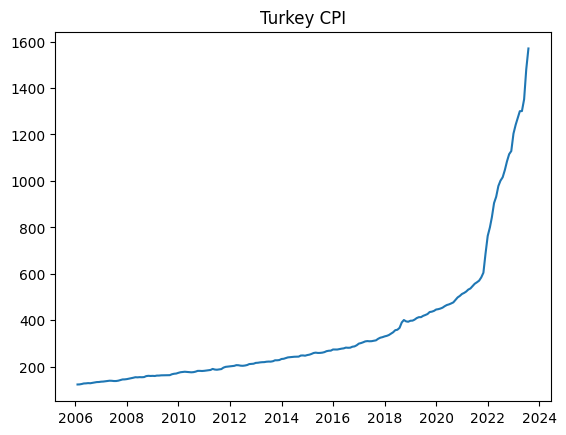

In [8]:
dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure()
plt.title("Turkey CPI")

plt.plot(df)
plt.show()


In [9]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-04-30,19.337032
2023-05-31,19.719514
2023-06-30,23.106042


In [10]:
dates= pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df6=df6.set_index(dates)

df6["Onceki USD/TL"]=df6["USD/TL"].shift(1)
df6.iloc[0,1]=1.32
df6

,USD/TL,Onceki USD/TL
2006-02-01,1.326535,1.320000
2006-03-01,1.335139,1.326535
2006-04-01,1.337345,1.335139
2006-05-01,1.420659,1.337345
2006-06-01,1.600536,1.420659
...,...,...
2023-04-01,19.337032,19.003478
2023-05-01,19.719514,19.337032
2023-06-01,23.106042,19.719514
2023-07-01,26.470338,23.106042


In [11]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
206,2023-4,9.505999e+09
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10


In [12]:
#Cleaning the data

money_supply=pd.DataFrame(money)
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money_supply


,Tarih,Para Arzi
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
206,2023-4,9.505999e+09
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10


In [13]:
money_supply=money_supply.set_index(dates)
money_supply["Para Arzi"]=money_supply["Para Arzi"]/1e+08
money_supply
dfn=pd.DataFrame(money_supply)
del dfn["Tarih"]
dfn["Para Arzi Onceki"]=dfn["Para Arzi"].shift(1)
dfn.iloc[0,1]=2.39
dfn


,Para Arzi,Para Arzi Onceki
2006-02-01,2.423895,2.390000
2006-03-01,2.494857,2.423895
2006-04-01,2.521919,2.494857
2006-05-01,2.751947,2.521919
2006-06-01,2.791388,2.751947
...,...,...
2023-04-01,95.059993,90.592762
2023-05-01,94.093167,95.059993
2023-06-01,108.345324,94.093167
2023-07-01,114.784753,108.345324


In [17]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4574,15-08-2023,86.28
4575,16-08-2023,84.49
4576,17-08-2023,85.24
4577,18-08-2023,85.92


In [18]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle
brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-04-30,84.739474
2023-05-31,75.466000
2023-06-30,74.839091


In [21]:

brent1=pd.DataFrame(brent)
brent1.columns=["Brent"]
brent1


,Brent
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-04-30,84.739474
2023-05-31,75.466000
2023-06-30,74.839091


In [22]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)

df14["Brent"]=brent1["Brent"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

,Brent
TIME,
2006-02-01,60.210000
2006-03-01,62.064783
2006-04-01,70.260000
2006-05-01,69.776957
2006-06-01,68.555909
...,...
2023-04-01,84.739474
2023-05-01,75.466000
2023-06-01,74.839091


In [23]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
206,2023-4,8.572114e+09
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09


In [24]:
dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
206,2023-4,85.721139
207,2023-5,88.043441
208,2023-6,95.646045
209,2023-7,98.468952


In [25]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3

,Kredi
TIME,
2006-02-01,1.381847
2006-03-01,1.481222
2006-04-01,1.527510
2006-05-01,1.664881
2006-06-01,1.740395
...,...
2023-04-01,85.721139
2023-05-01,88.043441
2023-06-01,95.646045


In [29]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.iloc[:59,1]=5
pfaiz.iloc[210,1]=25
pfaiz=pfaiz.head(211)
pfaiz

,Tarih,TP_APIFON4
0,2006-2,5.00
1,2006-3,5.00
2,2006-4,5.00
3,2006-5,5.00
4,2006-6,5.00
...,...,...
206,2023-4,8.70
207,2023-5,9.09
208,2023-6,12.84
209,2023-7,17.50


In [30]:
dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

,Politika Faizi
TIME,
2006-02-01,5.00
2006-03-01,5.00
2006-04-01,5.00
2006-05-01,5.00
2006-06-01,5.00
...,...
2023-04-01,8.70
2023-05-01,9.09
2023-06-01,12.84


In [31]:
X=pd.concat([df6["Onceki USD/TL"],dfn["Para Arzi Onceki"],df14.Brent,df3.Kredi,pfaiz["Politika Faizi"]],axis=1)



In [32]:
y=pd.DataFrame(df["CPI"])
y["CPI"]=y["CPI"].astype(float)
y


,CPI
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.20
2006-06-01,128.63
...,...
2023-04-01,1300.04
2023-05-01,1300.60
2023-06-01,1351.59
2023-07-01,1479.84


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())



c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9512.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          2.20e-176
Time:                        20:15:23   Log-Likelihood:                -603.78
No. Observations:                 147   AIC:                             1220.
Df Residuals:                     141   BIC:                             1238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               83.0739      4.998  

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
results.params

const               83.073885
Onceki USD/TL       15.669302
Para Arzi Onceki     5.470937
Brent                0.265272
Kredi                4.247872
Politika Faizi      -0.503550
dtype: float64

In [36]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df14.astype(float),
                                order=(0,1,0),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [37]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [38]:
pred_ci['Predicted'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
pred_ci['Observed'] = df14["Brent"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Brent,upper Brent,Predicted,Observed,"Diff, %%"
2022-11-01,79.239893,109.282550,94.261221,91.415455,3.113004
2022-12-01,76.660233,106.702891,91.681562,80.996667,13.191772
2023-01-01,70.443274,100.485931,85.464603,82.515909,3.573485
2023-02-01,69.755565,99.798223,84.776894,82.585000,2.654107
2023-03-01,66.434747,96.477404,81.456076,78.434348,3.852557
2023-04-01,52.736866,82.779524,67.758195,84.739474,-20.039396
2023-05-01,78.240109,108.282767,93.261438,75.466000,23.580736
2023-06-01,69.646212,99.688870,84.667541,74.839091,13.132776
2023-07-01,57.116686,87.159344,72.138015,80.108095,-9.949157
2023-08-01,60.287448,90.330106,75.308777,86.456000,-12.893522


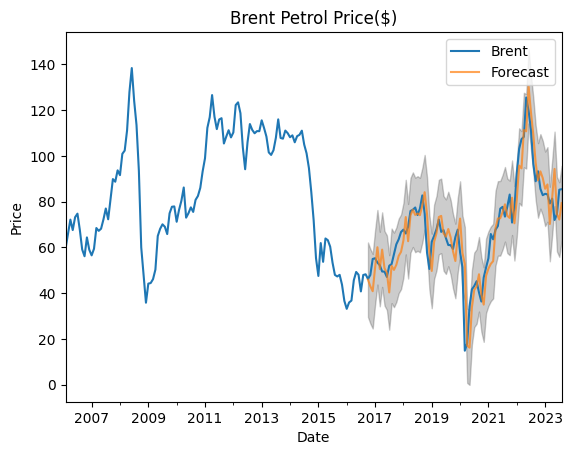

In [30]:
ax = df14['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")
plt.legend()
plt.show()

In [39]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

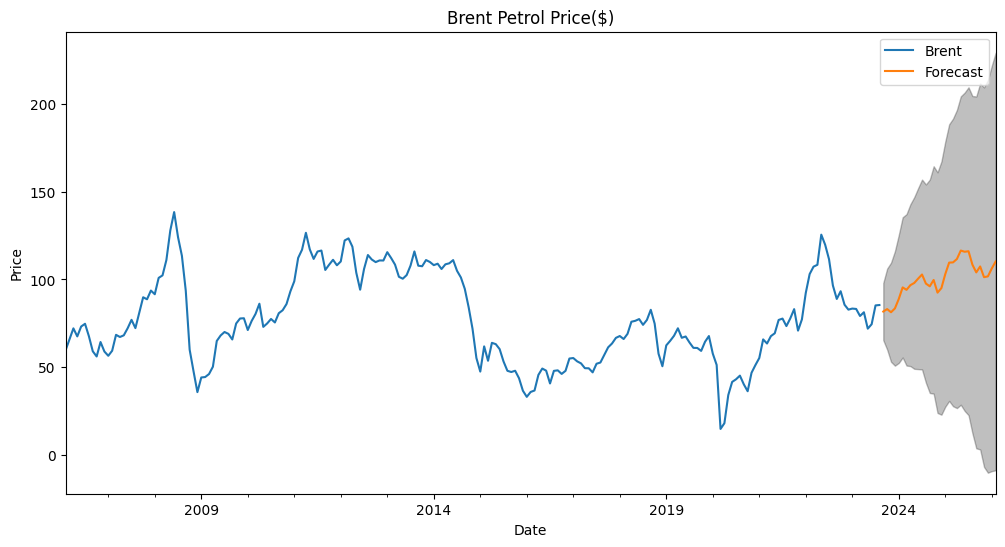

In [32]:
ax = df14.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")

plt.legend()

plt.show()

In [40]:
pred_ci['Mean'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
brenttahmin=pred_ci["Mean"]
brenttahmin=pd.DataFrame(brenttahmin)
brenttahmin.columns=["Brent"]
brenttahmin=pd.concat([df14.tail(1),brenttahmin],axis=0)
brenttahmin



,Brent
2023-08-01,86.456000
2023-09-01,81.313642
2023-10-01,84.152628
2023-11-01,83.950575
2023-12-01,81.514422
2024-01-01,86.407891
2024-02-01,91.531514
2024-03-01,94.958657
2024-04-01,94.878520
2024-05-01,94.266103


In [85]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(dfn["Para Arzi Onceki"].astype(float),
                                order=(1,1,1),
                                seasonal_order=(0,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [86]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [87]:
pred_ci['Predicted'] = (pred_ci["lower Para Arzi Onceki"] + pred_ci["upper Para Arzi Onceki"])/2
pred_ci['Observed'] = dfn["Para Arzi Onceki"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Para Arzi Onceki,upper Para Arzi Onceki,Predicted,Observed,"Diff, %%"
2022-11-01,76.363208,80.447240,78.405224,77.750311,0.842328
2022-12-01,79.789154,83.873018,81.831086,79.312824,3.175101
2023-01-01,80.898898,84.982596,82.940747,82.127970,0.989647
2023-02-01,83.540275,87.623811,85.582043,84.330974,1.483523
2023-03-01,85.914932,89.998467,87.956700,86.852197,1.271704
2023-04-01,89.281281,93.364654,91.322968,90.592762,0.806031
2023-05-01,92.890070,96.973282,94.931676,95.059993,-0.134985
2023-06-01,97.779679,101.862733,99.821206,94.093167,6.087625
2023-07-01,96.514699,100.597599,98.556149,108.345324,-9.035161
2023-08-01,111.519008,115.601756,113.560382,114.784753,-1.066667


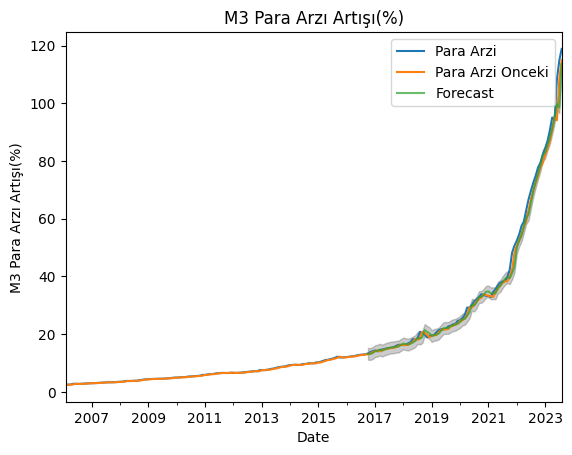

In [37]:
ax = dfn['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('M3 Para Arzı Artışı(%)')
plt.title("M3 Para Arzı Artışı(%)")
plt.legend()
plt.show()

In [88]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

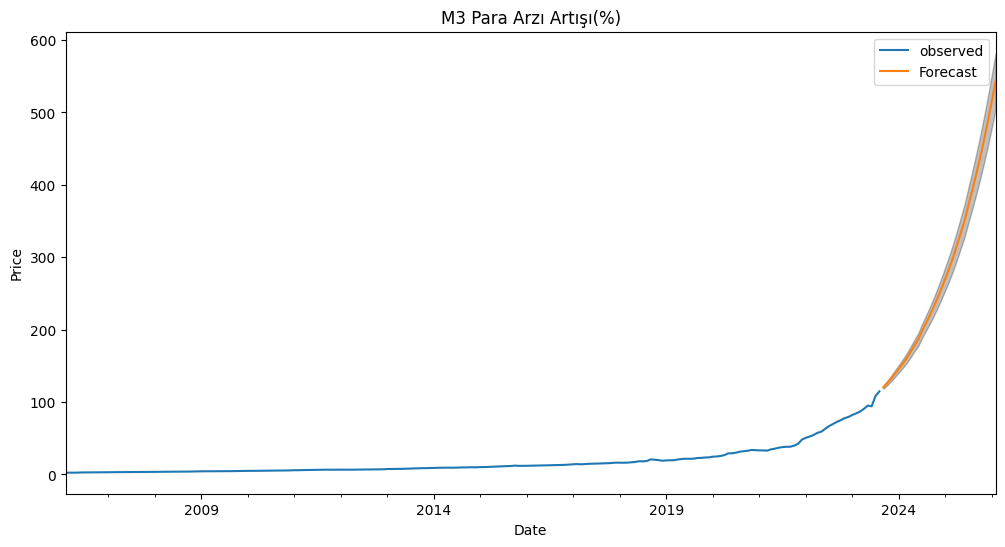

In [39]:
ax = dfn["Para Arzi Onceki"].plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("M3 Para Arzı Artışı(%)")

plt.legend()

plt.show()

In [89]:
import random
import numpy as np
pred_ci['Mean'] = (pred_ci["lower Para Arzi Onceki"] + pred_ci["upper Para Arzi Onceki"])/2
paraarzitahmin=pred_ci["Mean"]
paraarzitahmin=pd.concat([dfn["Para Arzi Onceki"].tail(1),paraarzitahmin])
paraarzitahmin=pd.DataFrame(paraarzitahmin)
paraarzitahmin.columns=["Para Arzi Tahmin"]
paraarzitahmin




,Para Arzi Tahmin
2023-08-01,114.784753
2023-09-01,120.343514
2023-10-01,126.071248
2023-11-01,132.386958
2023-12-01,139.076030
2024-01-01,145.980095
2024-02-01,152.864893
2024-03-01,160.234033
2024-04-01,168.816117
2024-05-01,177.730605


In [95]:
y=float(input('Para Arzi Aylık En Fazla % Kaç Artacağını Girin: '))
def paraarziassumption(y):
   drop_percentage = random.uniform(1+(y/300), 1+(y/100))
   
   paraarzitahmin["Para Arzi Assumption 2"]=paraarzitahmin["Para Arzi Tahmin"]
   
   for i in range(0, len(paraarzitahmin)-1):
   
      paraarzitahmin["Para Arzi Assumption 2"][i+1]=paraarzitahmin["Para Arzi Assumption 2"][i]*drop_percentage
   return paraarzitahmin
      
paraarziassumption(y)


,Para Arzi Tahmin,Para Arzi Assumption 2
2023-08-01,114.784753,114.784753
2023-09-01,120.343514,119.812941
2023-10-01,126.071248,125.061390
2023-11-01,132.386958,130.539749
2023-12-01,139.076030,136.258090
2024-01-01,145.980095,142.226925
2024-02-01,152.864893,148.457227
2024-03-01,160.234033,154.960450
2024-04-01,168.816117,161.748549
2024-05-01,177.730605,168.834002


In [47]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df6["USD/TL"].astype(float),
                                order=(0,1,1),
                                seasonal_order=(1,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [48]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [49]:
pred_ci['Predicted'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
pred_ci['Observed'] = df6["USD/TL"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower USD/TL,upper USD/TL,Predicted,Observed,"Diff, %%"
2022-11-01,18.248641,19.764564,19.006603,18.624382,2.052262
2022-12-01,18.097321,19.613244,18.855283,18.670545,0.989459
2023-01-01,17.569538,19.085460,18.327499,18.791373,-2.468546
2023-02-01,18.159763,19.675685,18.917724,18.857210,0.320907
2023-03-01,18.674076,20.189999,19.432037,19.003478,2.255161
2023-04-01,18.387051,19.902974,19.145012,19.337032,-0.993013
2023-05-01,19.062298,20.578221,19.820259,19.719514,0.510890
2023-06-01,19.353777,20.869699,20.111738,23.106042,-12.958966
2023-07-01,24.480982,25.996904,25.238943,26.470338,-4.651981
2023-08-01,26.621657,28.137580,27.379619,26.999127,1.409273


In [50]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

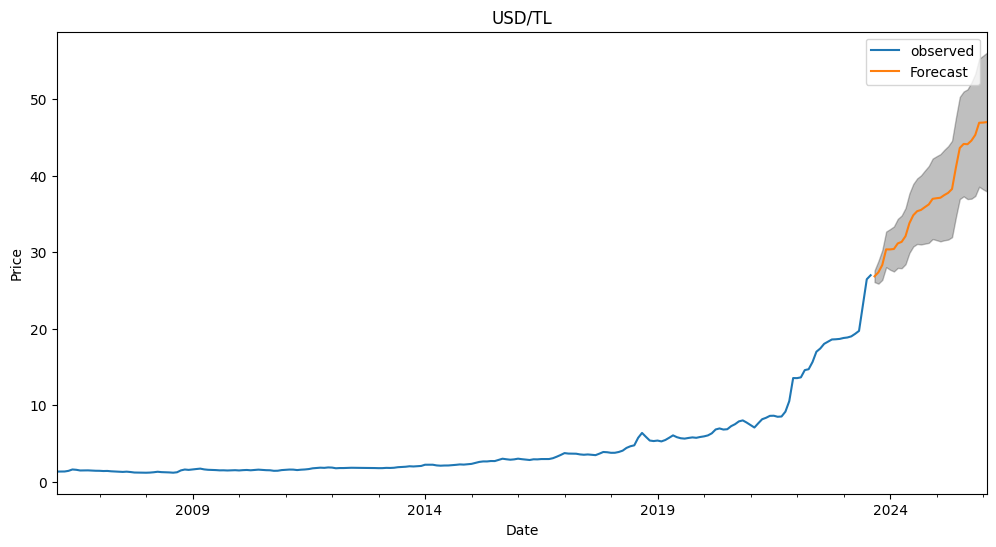

In [51]:
ax = df6["USD/TL"].plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("USD/TL")

plt.legend()

plt.show()

In [52]:
pred_ci['Mean'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
usdtahmin=pred_ci["Mean"]
usdtahmin=pd.concat([df6["USD/TL"].tail(1),usdtahmin])
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin.columns=["USD Tahmin"]







usdtahmin

,USD Tahmin
2023-08-01,26.999127
2023-09-01,26.853731
2023-10-01,27.376667
2023-11-01,28.336772
2023-12-01,30.376626
2024-01-01,30.371048
2024-02-01,30.429736
2024-03-01,31.156594
2024-04-01,31.361139
2024-05-01,32.106195


In [72]:
import random
x=float(input('Dolar/TL Aylık En Fazla % Kaç Artacağını Girin:   '))
def usdassumption(x):
    
  drop_percentage = random.uniform(1.0001, 1+(x/100))
  usdtahmin["USD Tahmin Assumption 2"]=usdtahmin["USD Tahmin"]
  for i in range(0, len(usdtahmin)-3):
   
    usdtahmin["USD Tahmin Assumption 2"][i+3]=usdtahmin["USD Tahmin Assumption 2"][i+2]*drop_percentage

  return usdtahmin

usdassumption(x)
  



,USD Tahmin,USD Tahmin Assumption 2
2023-08-01,26.999127,26.999127
2023-09-01,26.853731,26.853731
2023-10-01,27.376667,27.376667
2023-11-01,28.336772,27.918348
2023-12-01,30.376626,28.470746
2024-01-01,30.371048,29.034074
2024-02-01,30.429736,29.608549
2024-03-01,31.156594,30.194390
2024-04-01,31.361139,30.791823
2024-05-01,32.106195,31.401076


In [54]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df3.astype(float),
                                order=(3,1,0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [56]:
pred_ci['Predicted'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
pred_ci['Observed'] = df3["Kredi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Kredi,upper Kredi,Predicted,Observed,"Diff, %%"
2022-11-01,68.409970,71.188264,69.799117,69.536996,0.376953
2022-12-01,69.699036,72.477330,71.088183,72.851339,-2.420211
2023-01-01,72.575588,75.353882,73.964735,75.079809,-1.485185
2023-02-01,75.593019,78.371313,76.982166,77.112692,-0.169267
2023-03-01,79.131884,81.910178,80.521031,82.109915,-1.935070
2023-04-01,83.952597,86.730891,85.341744,85.721139,-0.442592
2023-05-01,87.388830,90.167124,88.777977,88.043441,0.834288
2023-06-01,90.036317,92.814611,91.425464,95.646045,-4.412708
2023-07-01,97.539596,100.317890,98.928743,98.468952,0.466940
2023-08-01,98.934606,101.712900,100.323753,99.238055,1.094034


In [57]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

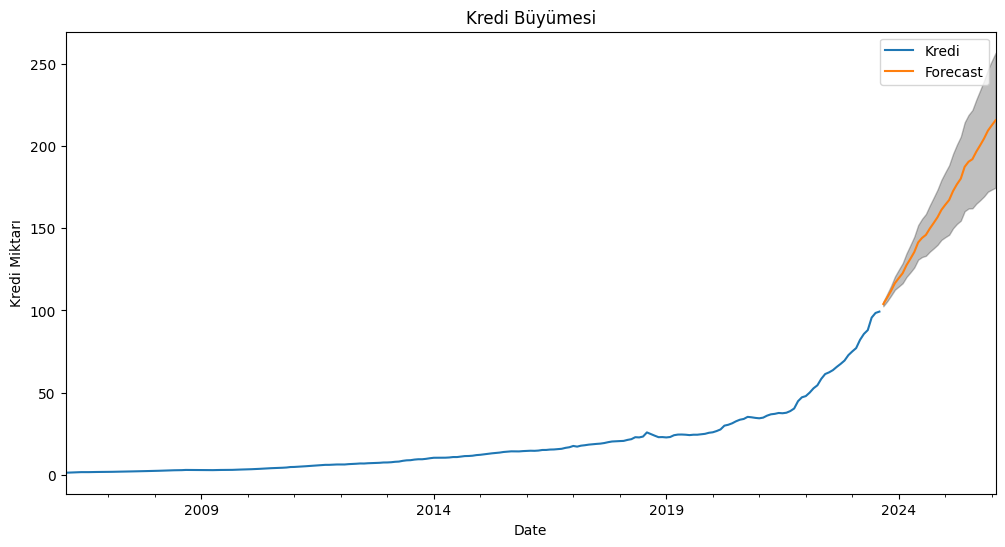

In [54]:
ax = df3.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Kredi Miktarı')
plt.title("Kredi Büyümesi")

plt.legend()

plt.show()

In [58]:
import random
pred_ci['Mean'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
kreditahmin=pred_ci["Mean"]
kreditahmin=pd.concat([df3["Kredi"].tail(1),kreditahmin])
kreditahmin=pd.DataFrame(kreditahmin)
kreditahmin.columns=["Kredi Tahmin"]
kreditahmin




,Kredi Tahmin
2023-08-01,99.238055
2023-09-01,103.838502
2023-10-01,107.678841
2023-11-01,111.776198
2023-12-01,116.430697
2024-01-01,119.475631
2024-02-01,122.428600
2024-03-01,127.333756
2024-04-01,131.166932
2024-05-01,135.230993


In [71]:
z=float(input('Kredi Hacmi Aylık En Fazla % Kaç Artacağını Girin: '))
def krediassumption(z):

   drop_percentage = random.uniform(1.005, 1+(z/100))
   drop_percentage1=random.uniform(0.005, 0.01)
   kreditahmin["Kredi Tahmin Assumption 2"]=kreditahmin["Kredi Tahmin"]
   for i in range(0, len(kreditahmin)-1):
   
      kreditahmin["Kredi Tahmin Assumption 2"][i+1]=kreditahmin["Kredi Tahmin Assumption 2"][i]*drop_percentage
   return kreditahmin
krediassumption(z)
   

,Kredi Tahmin,Kredi Tahmin Assumption 2
2023-08-01,99.238055,99.238055
2023-09-01,103.838502,100.464352
2023-10-01,107.678841,101.705802
2023-11-01,111.776198,102.962593
2023-12-01,116.430697,104.234914
2024-01-01,119.475631,105.522957
2024-02-01,122.428600,106.826917
2024-03-01,127.333756,108.146990
2024-04-01,131.166932,109.483375
2024-05-01,135.230993,110.836275


In [60]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(pfaiz.astype(float),
                                order=(3,1,0),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [61]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [62]:
pred_ci['Predicted'] = (pred_ci["lower Politika Faizi"] + pred_ci["upper Politika Faizi"])/2
pred_ci['Observed'] = pfaiz["Politika Faizi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Politika Faizi,upper Politika Faizi,Predicted,Observed,"Diff, %%"
2022-11-01,7.892768,11.964494,9.928631,9.27,7.104973
2022-12-01,5.931003,10.002730,7.966867,9.04,-11.870946
2023-01-01,6.814163,10.885887,8.850025,9.00,-1.666392
2023-02-01,6.478330,10.550055,8.514193,8.76,-2.806021
2023-03-01,6.821938,10.893621,8.857780,8.56,3.478736
2023-04-01,5.820706,9.892246,7.856476,8.70,-9.695679
2023-05-01,7.202363,11.273878,9.238120,9.09,1.629485
2023-06-01,7.093739,11.165242,9.129490,12.84,-28.898051
2023-07-01,11.662081,15.733584,13.697833,17.50,-21.726671
2023-08-01,19.170108,23.241611,21.205860,25.00,-15.176561


In [63]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

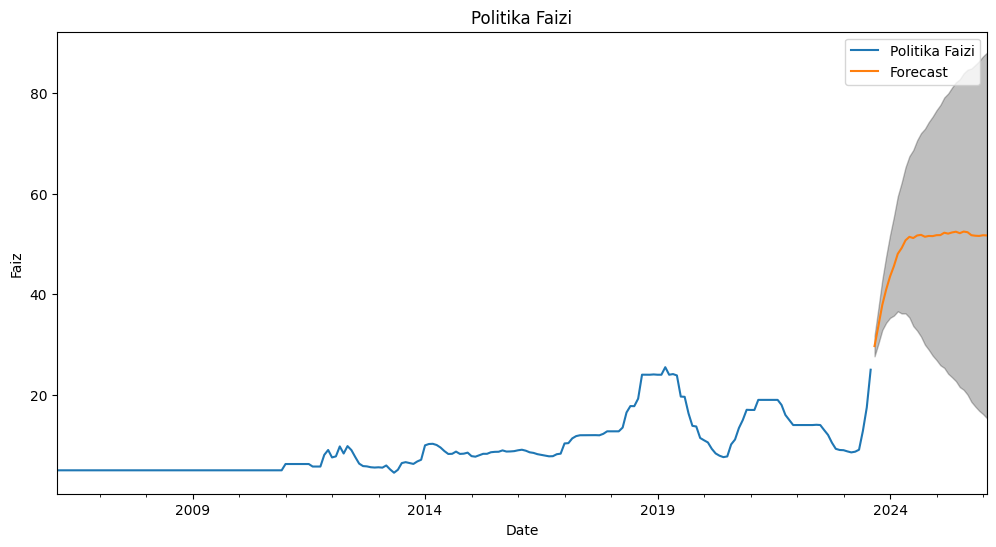

In [64]:
ax = pfaiz.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Faiz')
plt.title("Politika Faizi")

plt.legend()

plt.show()

In [65]:
pred_ci['Mean'] = (pred_ci["lower Politika Faizi"] + pred_ci["upper Politika Faizi"])/2
faiztahmin=pred_ci["Mean"]
faiztahmin=pd.concat([pfaiz["Politika Faizi"].tail(1),faiztahmin])
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Politika Faizi"]
faiztahmin["Politika Faizi"]=faiztahmin["Politika Faizi"].astype(int)
faiztahmin

,Politika Faizi
2023-08-01,25
2023-09-01,29
2023-10-01,33
2023-11-01,37
2023-12-01,40
2024-01-01,43
2024-02-01,45
2024-03-01,48
2024-04-01,49
2024-05-01,50


In [96]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()










res2=[]
res3=[]


for i in range(31):
    res2.append(results.params["const"]+results.params["Onceki USD/TL"]*usdtahmin["USD Tahmin"][i]+results.params["Para Arzi Onceki"]*paraarzitahmin["Para Arzi Tahmin"][i]+results.params["Kredi"]*kreditahmin["Kredi Tahmin"][i]+results.params["Brent"]*brenttahmin["Brent"][i]+results.params["Politika Faizi"]*faiztahmin["Politika Faizi"][i])
    res3.append(results.params["const"]+results.params["Onceki USD/TL"]*usdtahmin["USD Tahmin Assumption 2"][i]+results.params["Para Arzi Onceki"]*paraarzitahmin["Para Arzi Assumption 2"][i]+results.params["Kredi"]*kreditahmin["Kredi Tahmin Assumption 2"][i]+results.params["Brent"]*brenttahmin["Brent"][i]+results.params["Politika Faizi"]*faiztahmin["Politika Faizi"][i])
   
    



df9=pd.DataFrame()
dates=pd.date_range('2023-08-01','2026-03-01' , freq='1M')-pd.offsets.MonthBegin(1)
df9["Inflation"]=res2
df9["Assumption 2 Inflation"]=res3
df9['TIME']=dates
df9=df9.set_index(dates)
del df9['TIME']
df9

c:\Users\Bora\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Inflation,Assumption 2 Inflation
2023-08-01,1566.007754,1566.007754
2023-09-01,1610.304909,1593.069218
2023-10-01,1664.887208,1633.989626
2023-11-01,1729.821481,1675.720033
2023-12-01,1815.994900,1718.908182
2024-01-01,1866.401134,1765.649161
2024-02-01,1917.882924,1814.627475
2024-03-01,1989.823341,1864.391898
2024-04-01,2055.738490,1916.042501
2024-05-01,2132.781217,1969.434091


In [97]:
dff=pd.concat([df["CPI"].head(210),df9["Inflation"]],axis=0)
dff=pd.DataFrame(dff)
dff.columns=["CPI"]



dfas2=pd.concat([df["CPI"].head(210),df9["Assumption 2 Inflation"]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=["CPI"]
dfas2





,CPI
2006-02-01,123.840000
2006-03-01,124.180000
2006-04-01,125.840000
2006-05-01,128.200000
2006-06-01,128.630000
...,...
2025-10-01,3267.426001
2025-11-01,3371.668155
2025-12-01,3478.445970
2026-01-01,3592.477245


In [98]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor




# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
dff['onceki_yil_tufe'] = dff['CPI'].shift(12)
dfas2['onceki_yil_tufe'] = dfas2['CPI'].shift(12)




# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
dff['yillik_enflasyon_orani'] = ((dff['CPI'] / dff['onceki_yil_tufe']) - 1) * 100
dfas2['yillik_enflasyon_orani'] = ((dfas2['CPI'] / dfas2['onceki_yil_tufe']) - 1) * 100


# NaN değerleri (ilk 12 ay) veriden çıkarın
dff.dropna(inplace=True)
dfas2.dropna(inplace=True)




In [99]:
dfas2=dfas2.head(228)


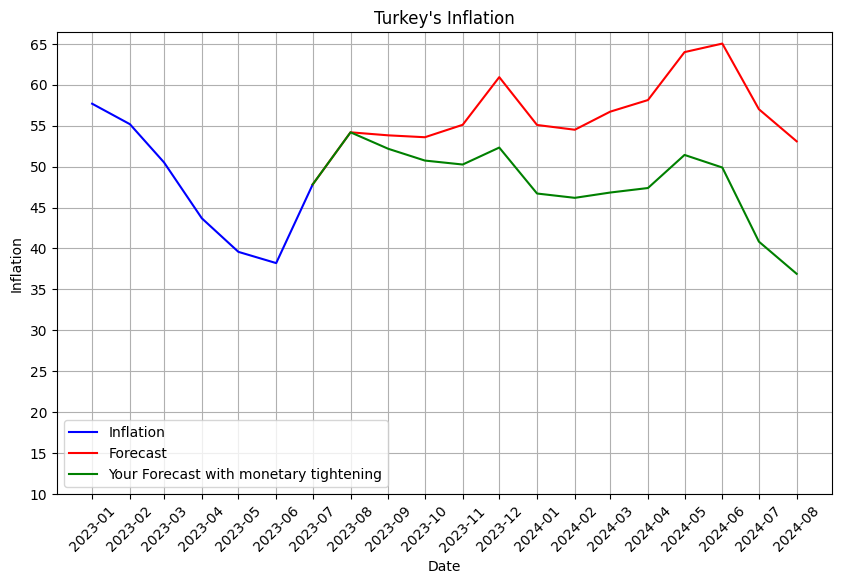

In [100]:
dates=pd.date_range('2008-02-01','2026-02-01' , freq='1M')-pd.offsets.MonthBegin(1)






# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(dff.iloc[191:198]["yillik_enflasyon_orani"], label='Inflation', color='blue')
plt.plot(dff.iloc[197:211]["yillik_enflasyon_orani"],label='Forecast', color='red')


plt.plot(dfas2.iloc[197:211]["yillik_enflasyon_orani"],label='Your Forecast with monetary tightening', color='green')


plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dff.iloc[191:211].index, dff.iloc[191:211].index.strftime('%Y-%m'), rotation=45)
y_max = int(max(dff["yillik_enflasyon_orani"].iloc[191:211]))
y_min = 10
y_interval = 0.5
y_ticks = [y_min]
while y_ticks[-1] < y_max:
    y_ticks.append(y_ticks[-1] + 5)

# Y ekseni etiketlerini ayarlama
plt.yticks(y_ticks)
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()


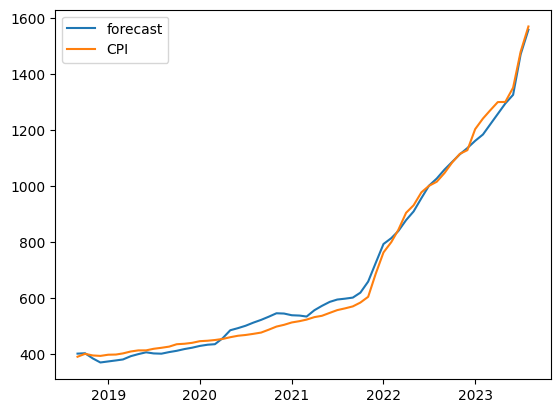

In [66]:
res6=[]
for i in range(-211,0):
    res6.append(results.params["const"]+results.params["Onceki USD/TL"]*df6["Onceki USD/TL"][i]+results.params["Para Arzi Onceki"]*dfn["Para Arzi Onceki"][i]+results.params["Kredi"]*df3["Kredi"][i]+results.params["Brent"]*df14["Brent"][i]+results.params["Politika Faizi"]*pfaiz["Politika Faizi"][i])
res6=pd.DataFrame(res6)
res6=res6.set_index(df.index)
res6.columns=["CPI"]
plt.plot(res6.tail(60),label="forecast")
plt.plot(df.tail(60),label="CPI")
plt.legend()

In [67]:
res6['onceki_yil_tufe'] = res6['CPI'].shift(12)


# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
res6['yillik_enflasyon_orani'] = ((res6['CPI'] / res6['onceki_yil_tufe']) - 1) * 100


# NaN değerleri (ilk 12 ay) veriden çıkarın
res6.dropna(inplace=True)
res6

,CPI,onceki_yil_tufe,yillik_enflasyon_orani
2007-02-01,143.852484,136.552392,5.346001
2007-03-01,145.708059,138.771423,4.998605
2007-04-01,146.258308,140.961945,3.757300
2007-05-01,145.976003,140.613024,3.813999
2007-06-01,147.341187,144.870937,1.705139
...,...,...,...
2023-04-01,1257.811020,878.717924,43.141614
2023-05-01,1295.038559,909.760906,42.349330
2023-06-01,1326.046494,957.210780,38.532340
2023-07-01,1470.330531,1001.372516,46.831524


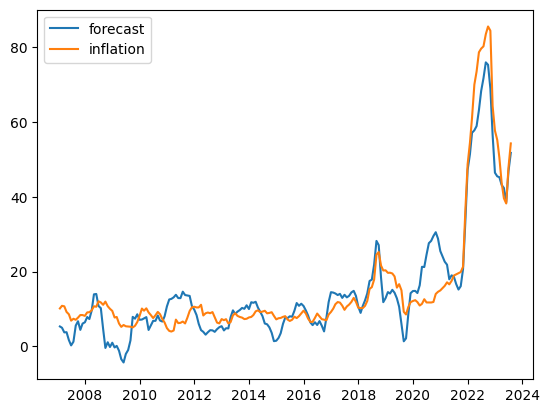

In [68]:
plt.plot(res6["yillik_enflasyon_orani"],label="forecast")
plt.plot(dff["yillik_enflasyon_orani"].head(199),label="inflation")
plt.legend()

In [69]:
dff["Onceki Ay TUFE"]=dff["CPI"].shift(1)

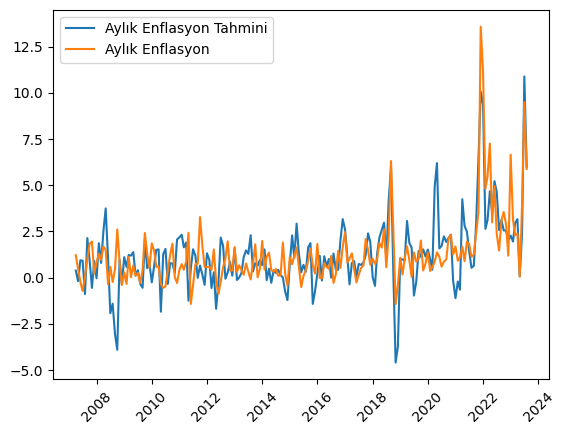

In [70]:
res6["Onceki Ay TUFE"]=res6["CPI"].shift(1)
res6.iloc[0,3]=1421
res6["Aylık Enflasyon Tahmin"]=((res6["CPI"]/res6["Onceki Ay TUFE"]-1)*100)
res6["Gerceklesen Aylık Enflasyon"]=((dff["CPI"].head(219)/dff["Onceki Ay TUFE"].head(219)-1)*100)
res6.iloc[195,4]=res6.iloc[195,4]-2.88
plt.plot(res6["Aylık Enflasyon Tahmin"].tail(197),label="Aylık Enflasyon Tahmini")
plt.plot(res6["Gerceklesen Aylık Enflasyon"].tail(197),label="Aylık Enflasyon")
plt.xticks(rotation=45)
plt.legend()